## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [3]:
import keras

from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

from keras.layers import BatchNormalization 
from keras.layers import Dense, Dropout, Activation, Flatten , Input
from keras.layers import Conv2D, MaxPooling2D , AveragePooling2D

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import os

Using TensorFlow backend.


In [0]:
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20

In [5]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#from keras.datasets import cifar10
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Find no.of samples are there in training and test datasets

In [10]:
print('Training shape:', X_train.shape)
print('Testing shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')      

Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)
60000 train samples
10000 test samples


### Find dimensions of an image in the dataset

In [11]:
print('Dimensions of the Image:', X_train[0].shape)

Dimensions of the Image: (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
stdscale = StandardScaler()
std_scale = stdscale.fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std  = std_scale.transform(X_test)

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)

### Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Activation,Dropout

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
model = Sequential()

In [0]:

model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(28,28,1),activation="relu"))

#model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:], filters = 32 ,kernel_size = (3,3) , Activation('relu')))
#model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:], filters = 32 ,kernel_size = (3,3) , Activation('relu')))

In [0]:
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

In [0]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [50]:
model.fit(X_train, y_train , batch_size=batch_size , validation_data=(X_test, y_test) , shuffle=True ,  epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 162us/sample - loss: 1.8240 - acc: 0.1962 - val_loss: 1.8239 - val_acc: 0.1989
Epoch 2/10
60000/60000 [==============================] - 9s 154us/sample - loss: 1.8240 - acc: 0.1961 - val_loss: 1.8239 - val_acc: 0.1980
Epoch 3/10
60000/60000 [==============================] - 9s 154us/sample - loss: 2.0494 - acc: 0.1664 - val_loss: 2.3594 - val_acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 9s 154us/sample - loss: 2.3097 - acc: 0.0991 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 9s 153us/sample - loss: 2.3030 - acc: 0.0979 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 9s 154us/sample - loss: 2.3029 - acc: 0.0971 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 9s 155us/sample - loss: 2.3029 - acc: 0.0984 - val_

In [54]:
print("Model Accuracy:")
model.evaluate(X_test, y_test) 

Model Accuracy:


TypeError: ignored

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

In [0]:
#model.add(Flatten())
#model.add(Dense(128))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(num_classes))
#model.add(Activation('softmax'))

In [51]:
keras.backend.clear_session()
model1 = Sequential()

model1.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(28,28,1),activation="relu"))
model1.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(28,28,1),activation="relu"))

#Add 2x2 maxpool layer 
model1.add(MaxPool2D(pool_size=(2,2)))
# Add dropout
model1.add(Dropout(rate=0.25))

#Flatten
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))

# Output Layer
model1.add(Dense(10))
model1.add(Activation('softmax'))

In [53]:
#Compile model
model1.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model1.fit(X_train, y_train, nb_epoch=10, validation_data=(X_test, y_test), callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3950 - acc: 0.8572 - val_loss: 0.3010 - val_acc: 0.8916
Epoch 2/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2589 - acc: 0.9055 - val_loss: 0.2580 - val_acc: 0.9059
Epoch 3/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2109 - acc: 0.9218 - val_loss: 0.2381 - val_acc: 0.9125
Epoch 4/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1784 - acc: 0.9330 - val_loss: 0.2232 - val_acc: 0.9205
Epoch 5/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1481 - acc: 0.9436 - val_loss: 0.2308 - val_acc: 0.9194
Epoch 6/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1268 - acc: 0.9522 - val_loss: 0.2377 - val_acc: 0.9202
Epoch 7/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1070 - acc: 0.9603 - val_l

In [45]:
print("Model Accuracy:")
model.evaluate(X_test, y_test) 

Model Accuracy:
10000/10000 [==============================] - 1s 88us/sample - loss: 1.8239 - acc: 0.1980


[1.8239298610687256, 0.198]

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)
   

datagen.fit(X_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

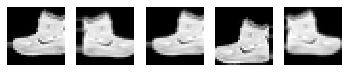

In [56]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [63]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

#callbacks=callback_list

model1.fit_generator(datagen.flow(X_train, y_train,batch_size=batch_size), epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3467 - acc: 0.8728 - val_loss: 0.2460 - val_acc: 0.9126
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3171 - acc: 0.8830 - val_loss: 0.2358 - val_acc: 0.9184
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2997 - acc: 0.8888 - val_loss: 0.2324 - val_acc: 0.9167
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2879 - acc: 0.8925 - val_loss: 0.2344 - val_acc: 0.9175
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2769 - acc: 0.8971 - val_loss: 0.2310 - val_acc: 0.9187
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2700 - acc: 0.8989 - val_loss: 0.2364 - val_acc: 0.9178
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2658 - acc: 0.9021 - val_loss: 0.2373 - val_acc: 0.9200
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

### **Load CIFAR10 dataset**

In [67]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [74]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
X_train = X_train.reshape(X_train.shape[0], 32,32,3)
X_test = X_test.reshape(X_test.shape[0], 32,32,3)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_gen = ImageDataGenerator(  
    rotation_range=50,  
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,  
    vertical_flip=True)

### **Prepare/fit the generator.**

In [0]:
data_gen.fit(X_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

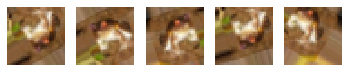

In [79]:
from matplotlib import pyplot as plt
gen = data_gen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='plasma')
    plt.plot()
plt.show()